In [142]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np

In [143]:
url = "https://data.cdc.gov/resource/n8mc-b4w4.json?res_state=NJ&case_month=2021-01&$limit=20000"

#how to filter for NJ first, date, and then 20000 cases?

In [144]:
response = requests.get(url)
print(response.url)


https://data.cdc.gov/resource/n8mc-b4w4.json?res_state=NJ&case_month=2021-01&$limit=20000


In [145]:
data = response.json()
# Use json.dumps to print the json
#print(json.dumps(data, indent=4, sort_keys=True))

#print data frame

df = pd.DataFrame(data)
df
      

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,case_positive_specimen
0,2021-01,NJ,34,MERCER,34021,0 - 17 years,Female,Unknown,Hispanic/Latino,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Missing,Missing,No,NaN,NaN
1,2021-01,NJ,34,MERCER,34021,0 - 17 years,Female,Unknown,Hispanic/Latino,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN,NaN
2,2021-01,NJ,34,MERCER,34021,0 - 17 years,Female,Unknown,Hispanic/Latino,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN,NaN
3,2021-01,NJ,34,MERCER,34021,0 - 17 years,Female,Unknown,Hispanic/Latino,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN,NaN
4,2021-01,NJ,34,MERCER,34021,0 - 17 years,Female,Unknown,Hispanic/Latino,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2021-01,NJ,34,OCEAN,34029,65+ years,Female,White,Non-Hispanic/Latino,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN,NaN
19996,2021-01,NJ,34,CAPE MAY,34009,0 - 17 years,Female,White,Non-Hispanic/Latino,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN,NaN
19997,2021-01,NJ,34,WARREN,34041,50 to 64 years,Male,Unknown,Missing,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,No,NaN,NaN
19998,2021-01,NJ,34,OCEAN,34029,65+ years,Female,White,Non-Hispanic/Latino,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN,NaN


In [146]:
#Total # of cases

num_cases = df["res_state"].count()

df_cases = pd.DataFrame({"Total # of NJ cases in Sample":[num_cases]})
df_cases



,Total # of NJ cases in Sample
0,20000


In [147]:
#Group by county
#county = df.groupby(['res_state','res_county']).count()

#county = df.groupby(['res_state','res_county']).size()

num_cases_county = df['res_county'].value_counts()

num_cases_county_percentage = (county/ 20000 ) * 100


county_df = pd.DataFrame({"Total # of Cases by NJ County": num_cases_county, "Percentage": num_cases_county_percentage })
county_df.round()

,Total # of Cases by NJ County,Percentage
CAMDEN,1435,7.0
HUDSON,1346,7.0
OCEAN,1176,6.0
CUMBERLAND,1159,6.0
UNION,1132,6.0
SALEM,1109,6.0
MERCER,1063,5.0
BERGEN,1025,5.0
BURLINGTON,1007,5.0
MORRIS,1003,5.0


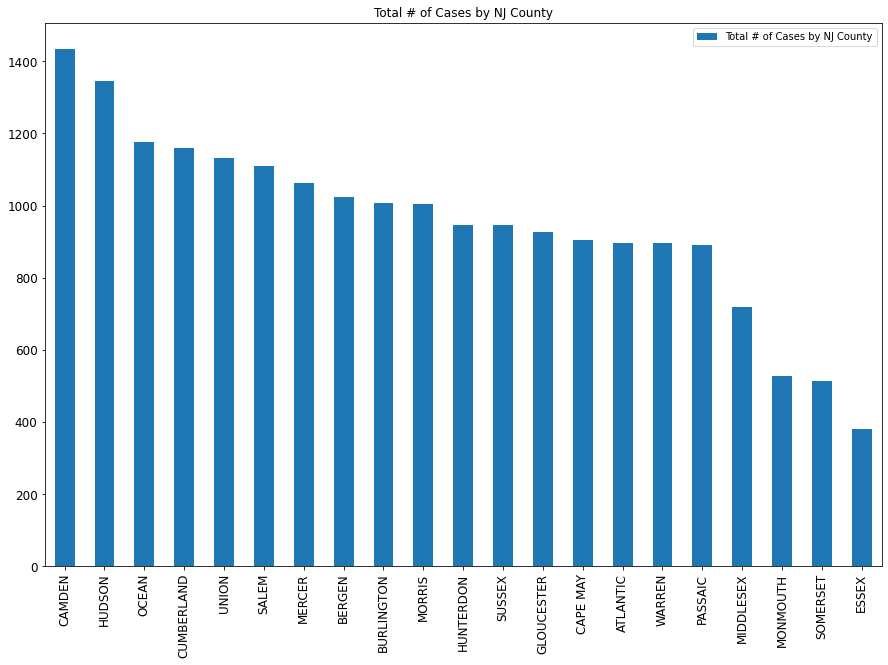

In [148]:
#create a bar chart

bar_chart = county_df[['Total # of Cases by NJ County']].plot(kind='bar', title ="Total # of Cases by NJ County", figsize=(15, 10), legend=True, fontsize=12)

bar_chart

In [149]:
# append population data into this file
url_pop = "https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&for=county:*&in=state:34&key=52e4b71218eb4d492e49c7dcde830174d23a8db9"


pop_response = requests.get(url_pop)
print(pop_response.url)


#find correlation between population size and num of cases.  
# t -test? 
# Can use Camden and Essex to visualize this? 

https://api.census.gov/data/2019/pep/charagegroups?get=NAME,POP&for=county:*&in=state:34&key=52e4b71218eb4d492e49c7dcde830174d23a8db9


In [151]:
pop_data = pop_response.json()
#print(json.dumps(pop_data, indent=4, sort_keys=True))
pop_df = pd.DataFrame(pop_data)
#pop_df

In [152]:
pop_df_simp = pd.DataFrame((pop_data), columns=("County","Population","State_Num","County_Num"))
pop_df_simp = pop_df_simp.drop(0).reset_index(drop=True)
pop_df_simp["County"] = pop_df_simp["County"].str.split(',',expand=True)
pop_df_simp["County_Num"] = pop_df_simp["State_Num"] + pop_df_simp["County_Num"]
pop_df_simp

,County,Population,State_Num,County_Num
0,Monmouth County,618795,34,34025
1,Mercer County,367430,34,34021
2,Sussex County,140488,34,34037
3,Cumberland County,149527,34,34011
4,Somerset County,328934,34,34035
5,Essex County,798975,34,34013
6,Ocean County,607186,34,34029
7,Atlantic County,263670,34,34001
8,Gloucester County,291636,34,34015
9,Salem County,62385,34,34033


In [159]:
total_pop = pop_df_simp["Population"].sum()
total_pop

'6187953674301404881495273289347989756071862636702916366238550182692039506471932202556341105267672391124371445349491845825062'